In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize']=(16,9)

#Creating a sample dataset with 4 clusters
X,y=make_blobs(n_samples=800,n_features=3,centers=4)

In [54]:
X

array([[-0.55225009, -0.74002625,  8.08553905],
       [ 1.48783225, -3.82311567,  6.76188964],
       [-2.03889102, -1.61601531,  6.38021289],
       ...,
       [ 7.84045697, -6.92882664, -7.78187409],
       [ 0.16249655, -5.49567114,  4.87524994],
       [ 5.84327126, -4.9151832 , -7.24080345]])

In [55]:
#Finding the optimal numbre of clusters using elbow method
wcss_list=[] #Initializing the list for the values of WCSS

#10 iterations
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

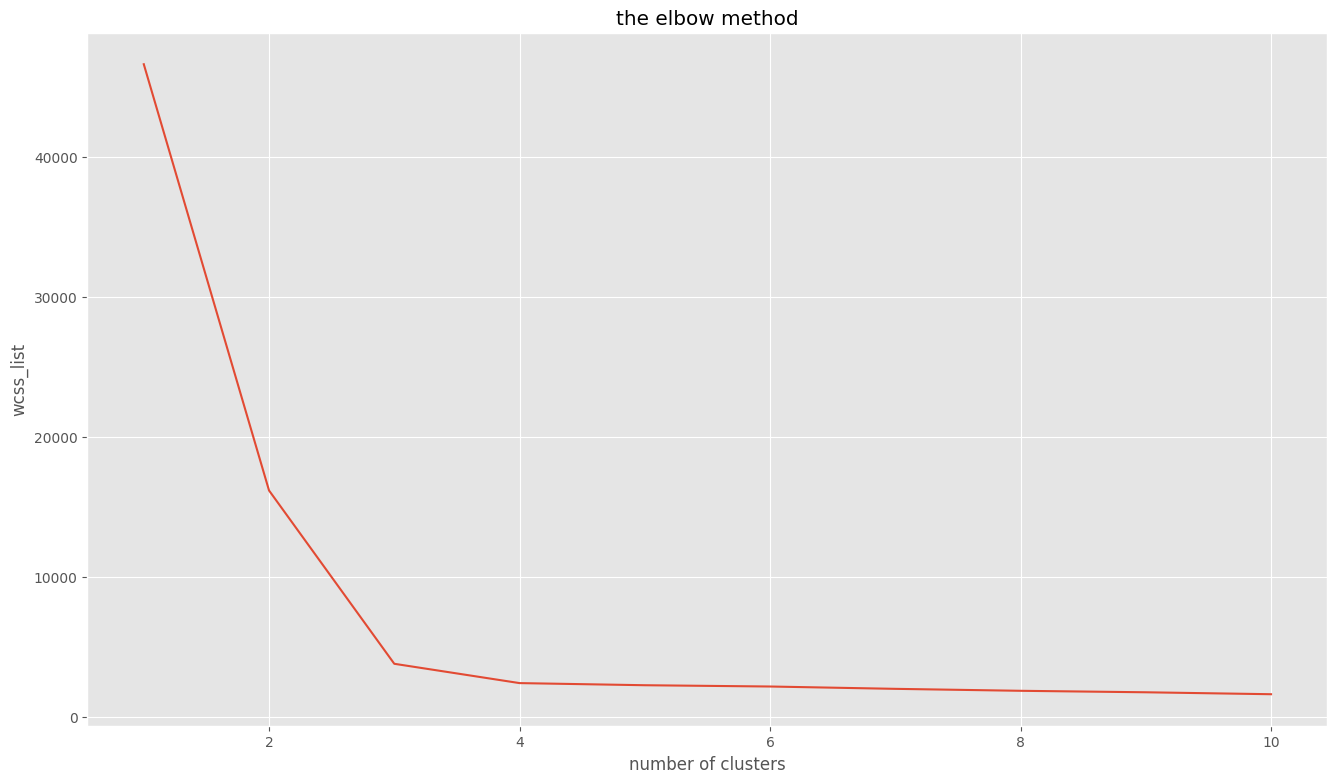

In [56]:
plt.plot(range(1,11),wcss_list)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss_list")
plt.show()

In [57]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [58]:
#Importing the dataset 
data=pd.read_csv('mallCustomerData.txt',sep=",")
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
df=pd.DataFrame(data, columns=['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [60]:
print(data['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


In [61]:
data = pd.get_dummies(data,columns=['Gender'])
print(data)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0            False         True  
1            False         True  
2             True        False  
3             True        False  
4            

CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


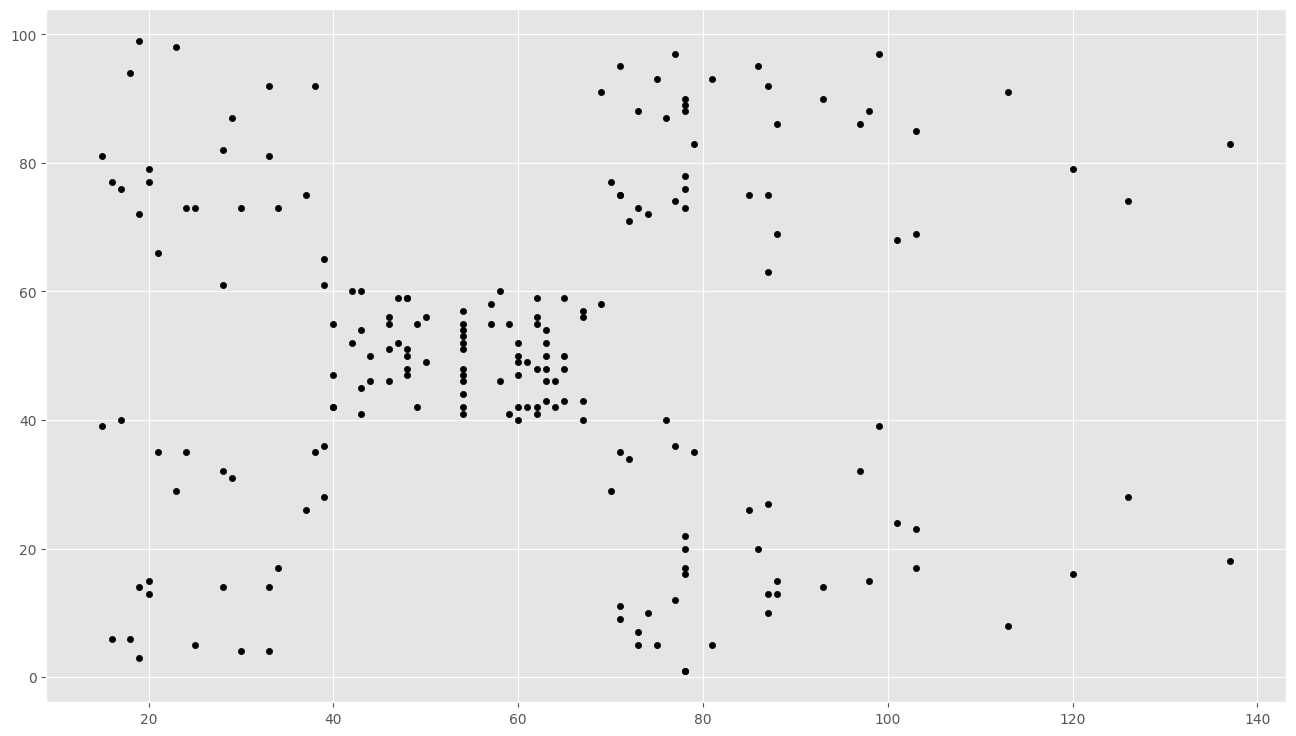

In [62]:
#Getting the values and plotting it
f1=data['Annual Income (k$)'].values
f2=data['Spending Score (1-100)'].values

for key in data.keys():
    print(key)

X=np.array(list(zip(f1,f2)))
#X=[[1,1],[1,2],[3,3],[4,4]]
plt.scatter(f1,f2,c='black',s=20)


CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


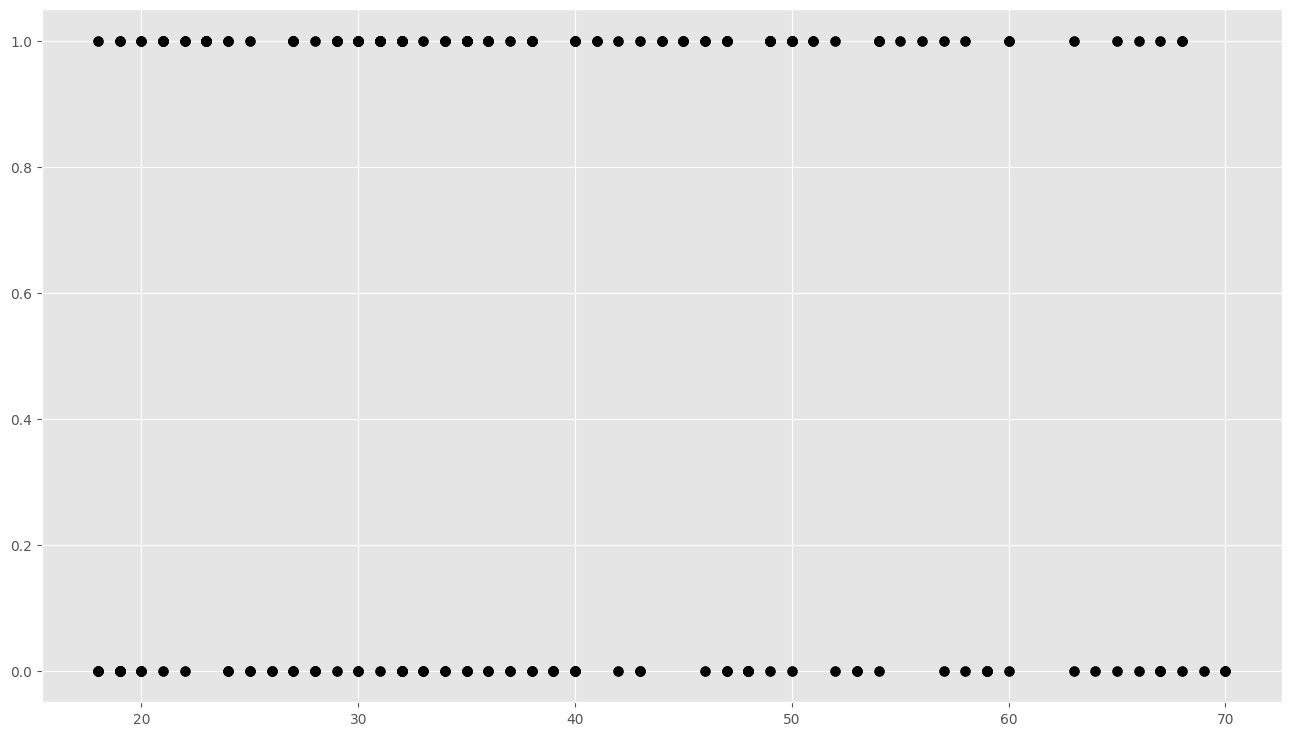

In [63]:
f3=data['Age'].values
f4=data['Gender_Female'].values

for key in data.keys():
    print(key)
X=np.array(list(zip(f3,f4)))
plt.scatter(f3,f4,c='black',s=50)

CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


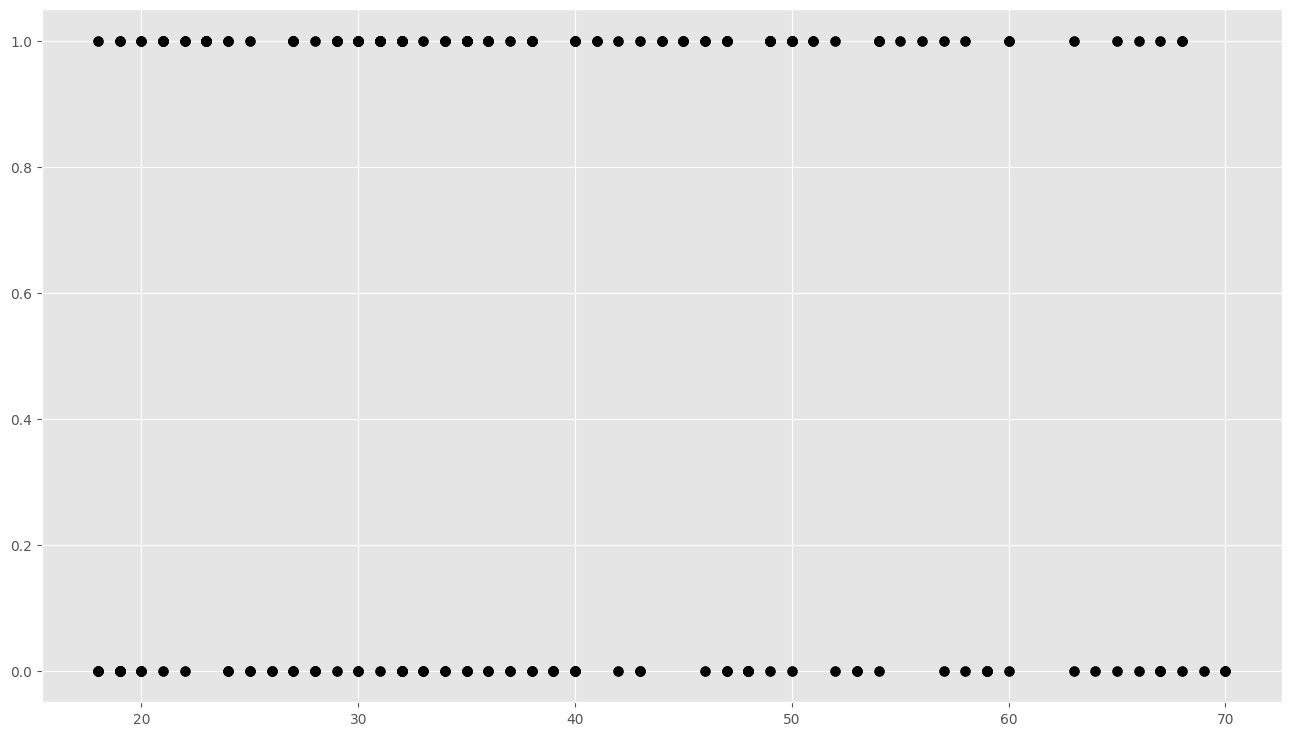

In [64]:
f3 = data['Age'].values
f5 = data['Gender_Male'].values


for key in data.keys():
    print(key)
X = np.array(list(zip(f3, f4)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f3, f4, c='black', s=50)

In [65]:
# Number of clusters
k=1
# X coordinates of random centroids
C_x=np.random.randint(0,np.max(X)-2,size=k)
# Y coordinates of random centroids
C_y=np.random.randint(0,np.max(X)-2,size=k)
C=np.array(list(zip(C_x,C_y)),dtype=np.float32)
print(C)

[[50. 64.]]


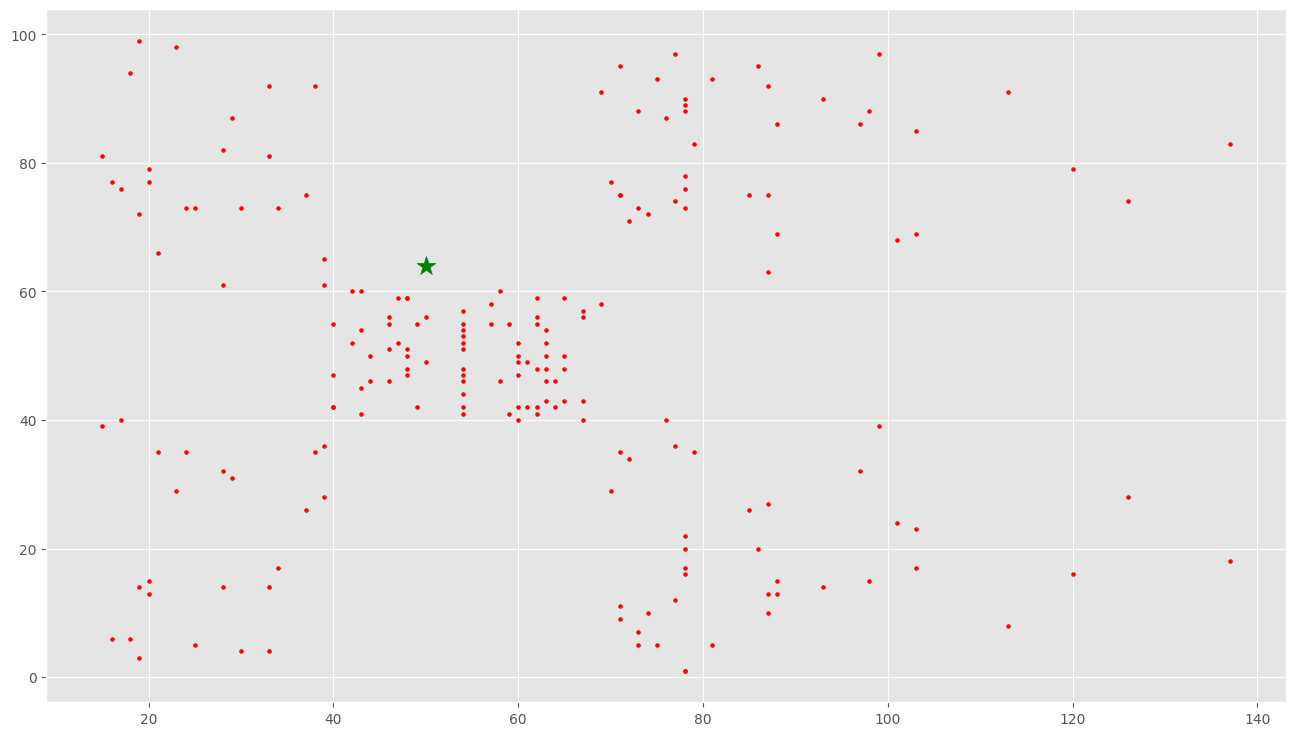

In [66]:
#Plotting along with the Centroids
plt.scatter(f1,f2,c='red',s=7)
plt.scatter(C_x,C_y,marker='*',s=200,c='g')

In [67]:
from sklearn.cluster import KMeans

#Number of Clusters
kmeans=KMeans(n_clusters=3)
#Fitting the input data
kmeans=kmeans.fit(X)
#Getting the cluster labels
labels=kmeans.predict(X)
#Centroid values
centroids=kmeans.cluster_centers_

In [68]:
# Comparing with scikit-learn centroids
print(C)# From Scratch
print(centroids)# From sci-kit learn

[[50. 64.]]
[[27.74038462  0.58653846]
 [45.37878788  0.59090909]
 [63.          0.4       ]]


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize']=(16,9)

# Creating a sample dataset with 4 clusters
X,y=make_blobs(n_samples=800,n_features=3,centers=4)

In [76]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2])


<Axes3D: >

<Figure size 1600x900 with 0 Axes>

In [71]:
# Initializing KMeans
kmeans=KMeans(n_clusters=4)
#Fitting with inputs
kmeans=kmeans.fit(X)
#Predicting the clusters
labels=kmeans.predict(X)
#Getting the clusters centers
C=kmeans.cluster_centers_

In [72]:
fig =plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2])
ax.scatter(C[:,0],C[:,1],C[:,2],c='#050505',s=1000)


<Figure size 1600x900 with 0 Axes>

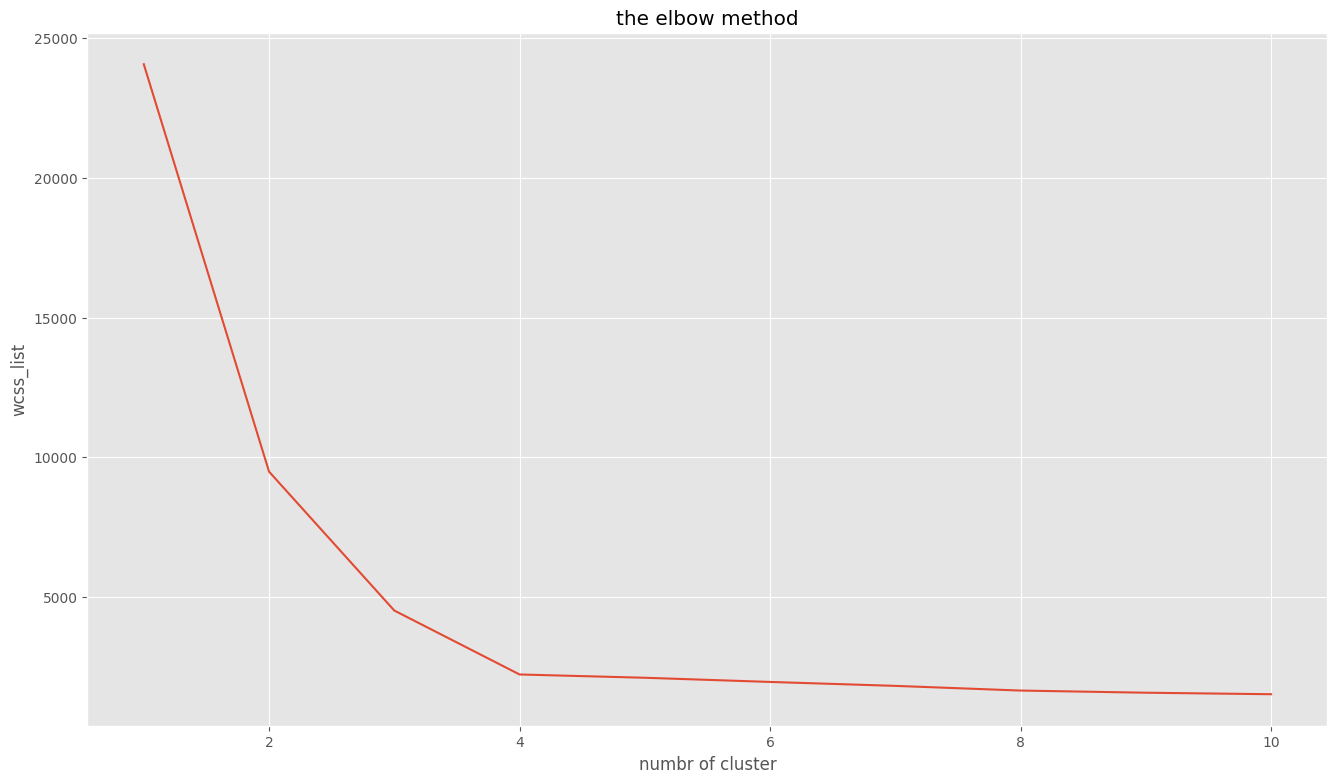

In [73]:
# Finding the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss_list =[] # Intializing the list for the values of WCSS

# 10 iterations
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state =42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title("the elbow method")
plt.xlabel("numbr of cluster")
plt.ylabel("wcss_list")
plt.show()